## **Data accession**

In [ ]:
!pip install louvain
!pip install igraph
!pip install leidenalg
!pip install anndata
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import silhouette_score
import zipfile
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread
import anndata as ad
from sklearn.metrics import adjusted_rand_score
import louvain
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-32-bbdd28fe5110>:11: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [ ]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-02-19 14:00:38--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  16.2MB/s    in 6.3s    

2025-02-19 14:00:45 (14.2 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file = "/content/drive/MyDrive/TA/Frogtail_files/ArrayExpressV2.zip"
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


In [ ]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


## **Make an anndata matrix using scanpy or anndata and load anndata**

In [ ]:
X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx')
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None)
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None)
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')

adata = ad.AnnData(X.T)

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [ ]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [ ]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


In [ ]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [ ]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [ ]:
adata.X = adata.X.tocsr()

In [ ]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

In [ ]:
extract_dir = "/content/drive/Shareddrive/STAT5243/Projects/Part 1/Datasets/"
adata = ad.read_h5ad('/content/drive/MyDrive/TA/Frogtail_files/cleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## **Preprocess data**

In [ ]:
adata.X.shape

(13199, 31535)

In [ ]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Compute mean expression for each gene
gene_means = np.mean(adata.X.toarray(), axis=0)  # Convert sparse matrix to array if necessary
gene_means

array([0.        , 0.02265323, 0.        , ..., 0.        , 0.28676415,
       0.02356239])

In [ ]:
# Compute the actual 80th and 5th percentile of gene means
threshold_80th = np.percentile(gene_means, 80)
threshold_5th = np.percentile(gene_means, 5)

In [ ]:
# Filter out genes outside of those percentiles
filtered_genes = (gene_means > threshold_5th) & (gene_means < threshold_80th)
adata = adata[:, filtered_genes]

In [ ]:
# Prepare data for dimension reduction and clustering
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.neighbors(adata, n_neighbors=20, metric="cosine")
sc.tl.umap(adata, min_dist=0.5)

## **Cluster data using two methods: Leiden and Louvain**

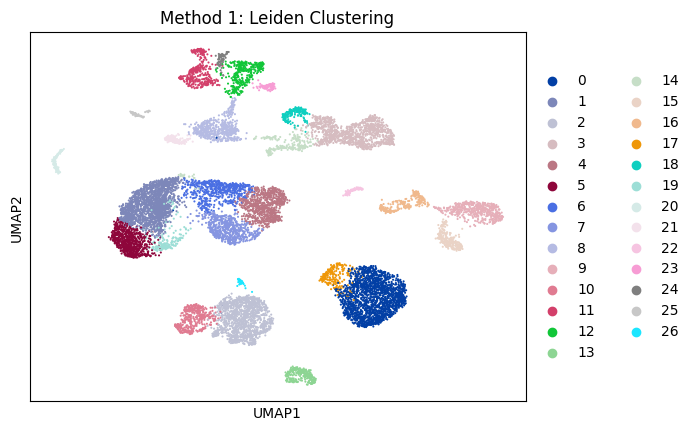

In [ ]:
# Leiden clustering

sc.tl.pca(adata)
sc.tl.leiden(adata)

sc.pl.umap(adata, color='leiden', title='Method 1: Leiden Clustering')

In [ ]:
X_pca = adata.obsm['X_pca']
ss_leiden = silhouette_score(X_pca, adata.obs['leiden'])
print(f'Silhouette Score for Leiden Clusters: {ss_leiden}')

Silhouette Score for Leiden Clusters: 0.16604579985141754


In [ ]:
true_labels = adata.obs['cluster']
leiden_labels = adata.obs['leiden']

ari_leiden = adjusted_rand_score(true_labels, leiden_labels)
print(f'Adjusted Rand Index for Leiden Clusters: {ari_leiden}')

Adjusted Rand Index for Leiden Clusters: 0.6146474388307518


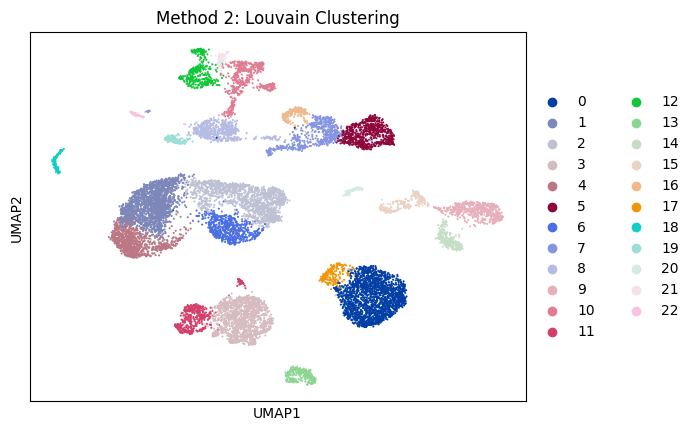

In [ ]:
# Louvain Clustering

sc.tl.pca(adata)
sc.tl.louvain(adata)

sc.pl.umap(adata, color='louvain', title='Method 2: Louvain Clustering')

In [ ]:
ss_louvain = silhouette_score(X_pca, adata.obs['louvain'])
print(f'Silhouette Score for Louvain Clusters: {ss_louvain}')

Silhouette Score for Louvain Clusters: 0.18343637883663177


In [ ]:
louvain_labels = adata.obs['louvain']

ari_louvain = adjusted_rand_score(true_labels, louvain_labels)
print(f'Adjusted Rand Index for Louvain Clusters: {ari_louvain}')

Adjusted Rand Index for Louvain Clusters: 0.619387438320791


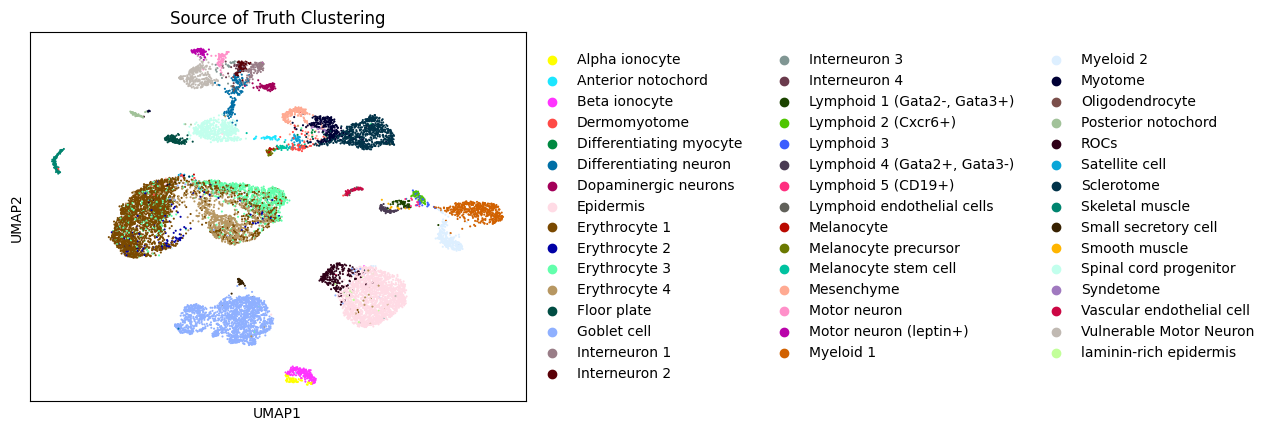

In [ ]:
# UMAP colored by 'source of truth' cluster for downstream comparison

sc.pl.umap(adata, color='cluster', title="Source of Truth Clustering")

## **Marker Gene Selection and Gene Analysis Method 1: Wilcoxon**

In [ ]:
# Create subsets of data for competent and incompetent regeneration

competent = adata[adata.obs['Condition'].str.contains('ST40|ST41')]
incompetent = adata[adata.obs['Condition'].str.contains('ST46|ST47')]

In [ ]:
# Add column to metadata with regeneration status

adata.obs['regeneration_status'] = adata.obs['Condition'].str.split("_").str[0].map(
    lambda x: 'competent' if x in ['ST40', 'ST41'] else 'incompetent'
)

In [ ]:
# Gene Selection Method 1: Wilcoxon/logfoldchanges

sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [ ]:
# 50 highest ranked genes for each Louvain cluster

rank_pooled = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(50)
rank_pooled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,npnt.L,loc101732300.L,acer1.L,loc100487311.like.L,fbxo7.S,ntn1.S,cep44.L,col4a2.L,c1orf158.L,gpr34.L,...,atp6v1c2.L,ncf2.L,il2rg.L,hgd.L,mmp19.like.2.L,atp2a1.S,shh.L,icam5.S,ntng2.L,loc100497103.L
1,sema3b.S,Xelaev18030604m.g,aqp3.L,hsd17b11.L,srms.S,nkx3.2.S,shcbp1.L,ednra.S,iqca1.L,loc101731250.L,...,tmem213.S,adam28.S,rab44.L,ednra.S,egfl6.L,actn3.L,npr3.S,prx.L,fgf13.L,loc100497103.S
2,tp63.L,creg1.L,slc11a2.S,Xelaev18044287m.g,Xelaev18046765m.g,loc100495131.like.L,shcbp1.S,ednra.L,duox1.L,loc101733164.L,...,Xelaev18043178m.g,Xelaev18012028m.g,was.L,tnfaip6.L,lpar3.L,myoz1.S,shh.S,cdh5.L,Xetrov90001110m.L,eln2.S
3,tp63.S,tal1.L,slc30a10.S,hopx.S,scly.L,Xelaev18012967m.g,tacc3.S,hgd.L,c7orf57.L,unnamed.S.7,...,tmem72.L,gpr141.L,rgs13.L,gch1.L,vwde.L,dupd1.S,foxa2.S,gngt1.L,apba1.L,t2.S
4,nbl1.L,plcxd2.S,fen1.S,loc100485266.L,Xelaev18030604m.g,ptch2.S,dlgap5.S,foxd2.S,c17orf58.L,loc100490989.S,...,loc101732585.L,camp1.L,was.S,Xelaev18016663m.g,megf6.S,trim72.L,Xelaev18046818m.g,elk3.L,lhx3.S,c2orf82.like.L
5,Xetrov90014283m.L,misp.S,Xelaev18026896m.g,klf5.S,vps26b.S,plod2.S,ncaph.S,spred1.L,pih1d3.L,loc100485017.L,...,Xelaev18045938m.g,c10orf54.L,Xelaev18001597m.g,ednra.L,cpa6.L,murc.S,slit1.S,myct1.L,Xelaev18007508m.g,loc100488932.S
6,lama3.L,loc100497733.like.S,Xelaev18025220m.g,prss8.L,znf577.S,smo.S,e2f8.L,tmem26.L,efcab2.L,parvg.S,...,slc4a9.L,Xelaev18021851m.g,Xelaev18038017m.g,Xetrov90005752m.L,fgf9.L,tmem38a.S,foxa1.L,cetp.L,meis3.L,shh.L
7,wnt7b.L,znf577.S,spns2.S,Xelaev18024247m.g,olah.L,pdgfrl.2.L,bub1b.L,pax9.L,c2orf50.L,MGC108117.L,...,rogdi.L,Xetrov90014332m.L,lcp2.L,tat.S,tinagl1.S,actn3.S,c17orf58.L,she.L,cadps2.like.L,lox.S
8,kiaa1522.L,znf238.2.L,pigq.L,grhl1.S,misp.S,pdgfrl.S,cenph.L,cyyr1.L,msi1.S,card11.L,...,loc100495848.S,cxcr2.S,Xelaev18023781m.g,tnfaip6.S,sp9.L,sh3bgr.L,c2orf50.L,vamp5.L,cadm3.L,lect1.S
9,sema3a.L,Xelaev18022570m.g,nt5e.L,Xelaev18019679m.g,cbs.S,itga5.L,ccnb2.L,ccdc80.S,daw1.S,tyrobp.S,...,loc100495557.L,il18rap.L,sla.L,serpind1.L,fgf7.L,gatm.S,Xelaev18044205m.g,pecam1.L,snap91.S,itgb8.L


In [190]:
# Bring in names of ROC marker genes for comparison

markers = {'wnt5a','loc100488523','loc100492954','egfl6','lpar3','cpa6','sp9','fgf9','fbn2','tinagl1','fgf7','vwde','lef1','lamb2','fgfr4','fgf7','rspo2','cpa6','loc100498358','krt','loc100486832','jag1','Xelaev18043128m','dlx2','tp73','gdf6','Xelaev18046800m','nid2','igfbp2','ism2','dlx2','loc100493805','frem2','Xelaev18044182m','bmp5','tspear','sema3f','robo4','jchain','rspo2','adamts18','pltp','Xelaev18034799m','lamb1','lamb1','unc5b','mmp28','fgf10','pzp','galnt15'}
my_markers = rank_pooled['17']

In [ ]:
# For each Lovain cluster's 50 top ranked gene (using Wilcoxon), what percentage of them are also in the marker gene list?
# We can see that cluster 17 stands out, at 72% of cells expressing genes in the marker gene list

match_percentages = {}

for col in rank_pooled.columns:
    col_set = set(rank_pooled[col])
    matched_genes = {gene for gene in col_set if any(gene.startswith(ext) for ext in markers)}
    match_percentage = (len(matched_genes) / len(set(rank_pooled[col]))) * 100
    match_percentages[col] = match_percentage

match_df = pd.DataFrame.from_dict(match_percentages, orient='index', columns=['Match Percentage'])
match_df

,Match Percentage
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
5,2.0
6,0.0
7,4.0
8,0.0
9,0.0


In [ ]:
# To confirm above results, use logfoldchanges to see where the marker genes were upregulated
# A positive logfc change means it was upregulated in a cluster.
# Stores these upregulated marker genes from cluster 17 in a separate var.

ranked_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
log_fold_changes = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])

gene_to_type = {
    gene: type
    for type in ranked_genes.columns
    for gene, logfc in zip(ranked_genes[type].head(10), log_fold_changes[type].head(10))
    if logfc > 0
}

gene_type_df = pd.DataFrame({
    'Gene': list(gene_to_type.keys()),
    'Type': list(gene_to_type.values())
})

gene_type_df["Is_Marker"] = gene_type_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))

highlight_genes = gene_type_df.loc[gene_type_df["Is_Marker"] == True, "Gene"].tolist()

gene_type_df[gene_type_df.Is_Marker==True]

,Gene,Type,Is_Marker
164,egfl6.L,17,True
165,lpar3.L,17,True
166,vwde.L,17,True
168,cpa6.L,17,True
169,fgf9.L,17,True
170,tinagl1.S,17,True
171,sp9.L,17,True
172,fgf7.L,17,True


In [ ]:
# Rank genes for competent regeneration tadpoles before amputation by Louvain clusters

competent_preamp = competent[competent.obs.DaysPostAmputation==0]
sc.tl.rank_genes_groups(competent_preamp, groupby='louvain', method='wilcoxon')

# Use logfoldchanges to see where the marker genes were upregulated before amputation

ranked_genes_comp_preamp = pd.DataFrame(competent_preamp.uns['rank_genes_groups']['names'])
log_fold_changes_comp_preamp = pd.DataFrame(competent_preamp.uns['rank_genes_groups']['logfoldchanges'])

gene_to_type = {
    gene: type
    for type in ranked_genes_comp_preamp.columns
    for gene, logfc in zip(ranked_genes_comp_preamp[type].head(10), log_fold_changes_comp_preamp[type].head(10))
    if logfc > .5
}

gene_type_comp_preamp_df = pd.DataFrame({
    'Gene': list(gene_to_type.keys()),
    'Type': list(gene_to_type.values())
})

gene_type_comp_preamp_df["Is_Marker"] = gene_type_comp_preamp_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))
gene_type_comp_preamp_df[gene_type_comp_preamp_df.Is_Marker==True]

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:646: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.st

,Gene,Type,Is_Marker
2,tinagl1.like.L,0,True
39,krt8.2.S,3,True
67,lamb1.S,7,True
157,egfl6.L,17,True
158,vwde.L,17,True
159,cpa6.L,17,True
160,fgf7.L,17,True
161,krt.L,17,True
163,tinagl1.S,17,True
164,fgf9.L,17,True


In [ ]:
# Rank genes for incompetent regeneration tadpoles before amputation by Louvain clusters

incompetent_preamp = incompetent[incompetent.obs.DaysPostAmputation==0]
sc.tl.rank_genes_groups(incompetent_preamp, groupby='louvain', method='wilcoxon')

# Use logfoldchanges to see where the marker genes were upregulated before amputation

ranked_genes_incomp_preamp = pd.DataFrame(incompetent_preamp.uns['rank_genes_groups']['names'])
log_fold_changes_incomp_preamp = pd.DataFrame(incompetent_preamp.uns['rank_genes_groups']['logfoldchanges'])

gene_to_type = {
    gene: type
    for type in ranked_genes_incomp_preamp.columns
    for gene, logfc in zip(ranked_genes_incomp_preamp[type].head(10), log_fold_changes_incomp_preamp[type].head(10))
    if logfc > .5
}

gene_type_incomp_preamp_df = pd.DataFrame({
    'Gene': list(gene_to_type.keys()),
    'Type': list(gene_to_type.values())
})

gene_type_incomp_preamp_df["Is_Marker"] = gene_type_incomp_preamp_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))
gene_type_incomp_preamp_df[gene_type_incomp_preamp_df.Is_Marker==True]

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:646: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.st

,Gene,Type,Is_Marker
163,lpar3.L,17,True
165,sp9.L,17,True
166,unc5b.L,17,True
167,fgf7.L,17,True
169,tinagl1.S,17,True
170,egfl6.L,17,True
171,lef1.S,17,True
172,lamb2.L,17,True
194,robo4.L,20,True


In [ ]:
# Rank genes for competent regeneration tadpoles after amputation by Louvain clusters

competent_postamp = competent[competent.obs.DaysPostAmputation>0]
sc.tl.rank_genes_groups(competent_postamp, groupby='louvain', method='wilcoxon')

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:646: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.st

In [ ]:
# Use logfoldchanges to see where the marker genes were upregulated after amputation

ranked_genes_comp = pd.DataFrame(competent_postamp.uns['rank_genes_groups']['names'])
log_fold_changes_comp = pd.DataFrame(competent_postamp.uns['rank_genes_groups']['logfoldchanges'])

gene_to_type = {
    gene: type
    for type in ranked_genes_comp.columns
    for gene, logfc in zip(ranked_genes_comp[type].head(10), log_fold_changes_comp[type].head(10))
    if logfc > .5
}

gene_type_comp_df = pd.DataFrame({
    'Gene': list(gene_to_type.keys()),
    'Type': list(gene_to_type.values())
})

gene_type_comp_df["Is_Marker"] = gene_type_comp_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))
gene_type_comp_df[gene_type_comp_df.Is_Marker==True]

,Gene,Type,Is_Marker
77,lamb1.S,7,True
163,cpa6.L,17,True
164,vwde.L,17,True
165,lpar3.L,17,True
166,egfl6.L,17,True
167,jag1.L,17,True
168,fgf9.L,17,True
169,ism2.L,17,True
170,lamb2.L,17,True
172,tp73.L,17,True


In [ ]:
# Rank genes for incompetent regeneration tadpoles after amputation by Louvain clusters

incompetent_postamp = incompetent[incompetent.obs.DaysPostAmputation>0]
cluster_counts = incompetent_postamp.obs["louvain"].value_counts()
valid_clusters = cluster_counts[cluster_counts > 1].index.tolist()
incompetent_postamp = incompetent_postamp[incompetent_postamp.obs["louvain"].isin(valid_clusters)].copy()

sc.tl.rank_genes_groups(incompetent_postamp, groupby='louvain', method='wilcoxon')

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [ ]:
# Use logfoldchanges to see where the marker genes were upregulated after amputation

ranked_genes_incomp = pd.DataFrame(incompetent_postamp.uns['rank_genes_groups']['names'])
log_fold_changes_incomp = pd.DataFrame(incompetent_postamp.uns['rank_genes_groups']['logfoldchanges'])

gene_to_type_incomp = {
    gene: type
    for type in ranked_genes_incomp.columns
    for gene, logfc in zip(ranked_genes_incomp[type].head(10), log_fold_changes_incomp[type].head(10))
    if logfc > 1
}

gene_type_incomp_df = pd.DataFrame({
    'Gene': list(gene_to_type_incomp.keys()),
    'Type': list(gene_to_type_incomp.values())
})

gene_type_incomp_df["Is_Marker"] = gene_type_incomp_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))
gene_type_incomp_df[gene_type_incomp_df.Is_Marker==True]

,Gene,Type,Is_Marker


## **Marker Gene Selection and Gene Analysis Method 2: Logistic Regression**

In [ ]:
sc.tl.rank_genes_groups(adata, groupby="louvain", method="logreg")

In [ ]:
# Findings were extremely similar to the Wilcoxon method, confirming the above

ranked_genes_log = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
logreg_scores_log = pd.DataFrame(adata.uns['rank_genes_groups']['scores'])

gene_to_type = {
    gene: type
    for type in ranked_genes_log.columns
    for gene, score in zip(ranked_genes_log[type].head(10), logreg_scores_log[type].head(10))
}

gene_type_log_df = pd.DataFrame({
    'Gene': list(gene_to_type.keys()),
    'Type': list(gene_to_type.values())
})

gene_type_log_df["Is_Marker"] = gene_type_log_df["Gene"].apply(lambda gene: any(gene.startswith(marker) for marker in markers))
gene_type_log_df[gene_type_log_df.Is_Marker==True]

,Gene,Type,Is_Marker
74,lamb1.S,7,True
170,cpa6.L,17,True
172,egfl6.L,17,True
173,fgf9.L,17,True
174,fgf7.S,17,True
175,lpar3.L,17,True
176,tinagl1.S,17,True
177,fgf7.L,17,True
178,cpa6.S,17,True
179,sp9.L,17,True


## **Marker Selection Visualizations**

In [198]:
marker_ser = pd.Series(list(markers))

In [208]:
matched_marker = {gene for gene in adata.var.index if any(gene.startswith(ext) for ext in marker_ser)}

In [229]:
vmin = min(adata.obs["my_marker_score"].min(), adata.obs["marker_score"].min())
vmax = max(adata.obs["my_marker_score"].max(), adata.obs["marker_score"].max())
adata.obs["my_marker_score"] = adata[:, adata.var.index.isin(my_markers)].X.mean(axis=1)
adata.obs["marker_score"] = adata[:, list(matched_marker)].X.mean(axis=1)

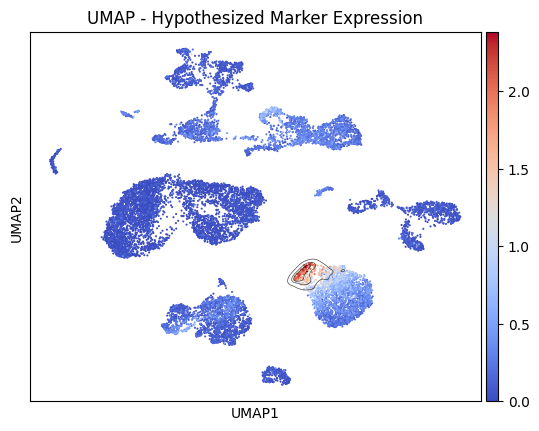

In [232]:
# Expression of my hypothesized marker genes in cells

sc.pl.umap(adata, color="my_marker_score", title="UMAP - Hypothesized Marker Expression", color_map="coolwarm", show=False, vmin=vmin, vmax=vmax)

umap_coords = adata.obsm["X_umap"]
cluster_labels = adata.obs['louvain']

cluster_17_mask = cluster_labels == '17'
x_17, y_17 = umap_coords[cluster_17_mask, 0], umap_coords[cluster_17_mask, 1]

sns.kdeplot(x=x_17, y=y_17, levels=4, color="black", linewidths=.5, alpha=0.7)

plt.show()

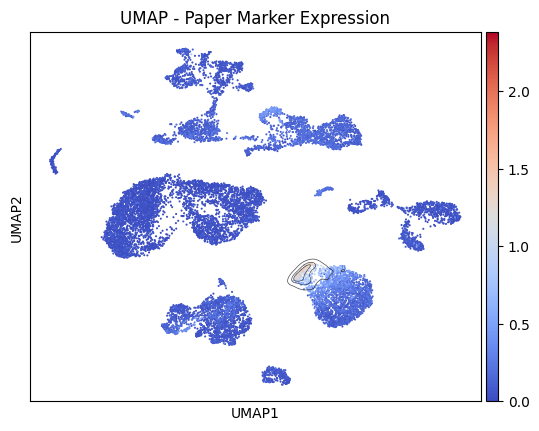

In [230]:
# Expression of my  paper's marker genes in cells

sc.pl.umap(adata, color="marker_score", title="UMAP - Paper Marker Expression", color_map="coolwarm", show=False, vmin=vmin, vmax=vmax)

umap_coords = adata.obsm["X_umap"]
cluster_labels = adata.obs['louvain']

cluster_17_mask = cluster_labels == '17'
x_17, y_17 = umap_coords[cluster_17_mask, 0], umap_coords[cluster_17_mask, 1]

sns.kdeplot(x=x_17, y=y_17, levels=4, color="black", linewidths=.5, alpha=0.7)

plt.show()

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


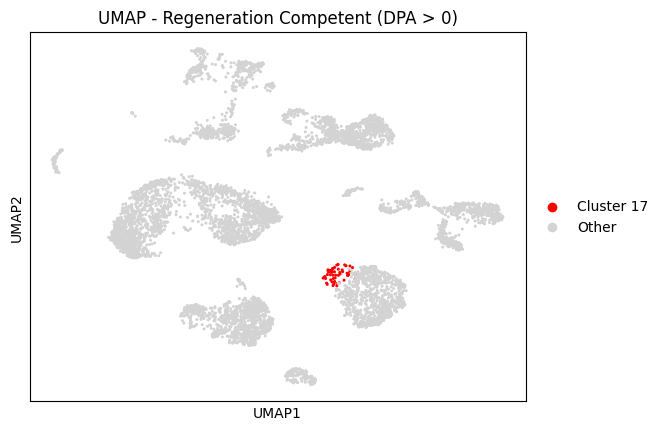

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


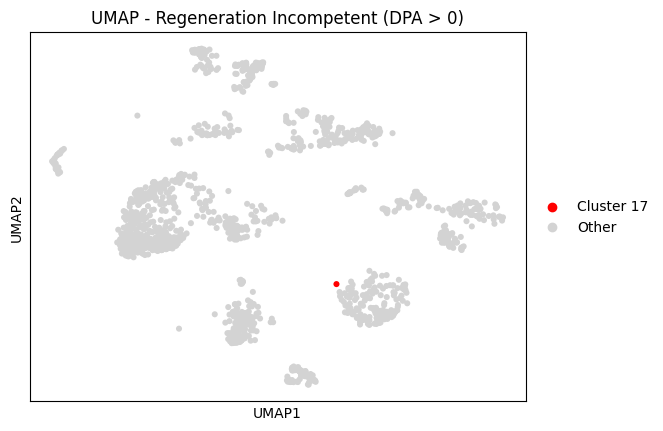

In [231]:
# Compare UMAPS for cells with upregulated genes for regeneration competent vs incompetent tadpoles after amputation
# The super concentrated area of red for regeneration competent tadpoles doesnt exist in the regeneration incompetent tadpols

adata.obs["highlight_log"] = ["Cluster 17" if x == "17" else "Other" for x in adata.obs["louvain"]]

competent_bool = adata.obs["regeneration_status"] == "competent"
incompetent_bool = adata.obs["regeneration_status"] == "incompetent"

regen_comp = competent_bool & (adata.obs["DaysPostAmputation"] > 0)

regen_incomp = incompetent_bool & (adata.obs["DaysPostAmputation"] > 0)

sc.pl.umap(adata[regen_comp], color="highlight_log", palette={"Cluster 17": "red", "Other": "lightgray"}, title="UMAP - Regeneration Competent (DPA > 0)")
sc.pl.umap(adata[regen_incomp], color="highlight_log", palette={"Cluster 17": "red", "Other": "lightgray"}, title="UMAP - Regeneration Incompetent (DPA > 0)")


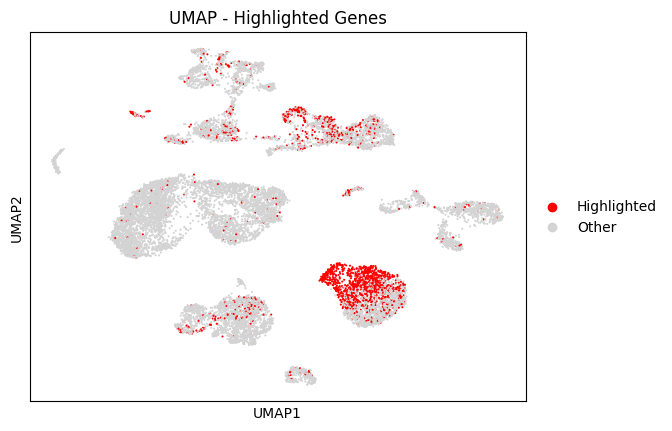

In [ ]:
# UMAP visualization of marker genes that were upregulated across the pooled data
# It's easy to see these genes are concentrated in the circular shape on the bottom right quadrant

cells_to_highlight = adata[:, adata.var.index.isin(highlight_genes)].X.sum(axis=1) > 0
adata.obs["highlight_log"] = ["Highlighted" if x else "Other" for x in cells_to_highlight]
sc.pl.umap(adata, color="highlight_log", palette={"Highlighted": "red", "Other": "lightgray"}, title="UMAP - Highlighted Genes")

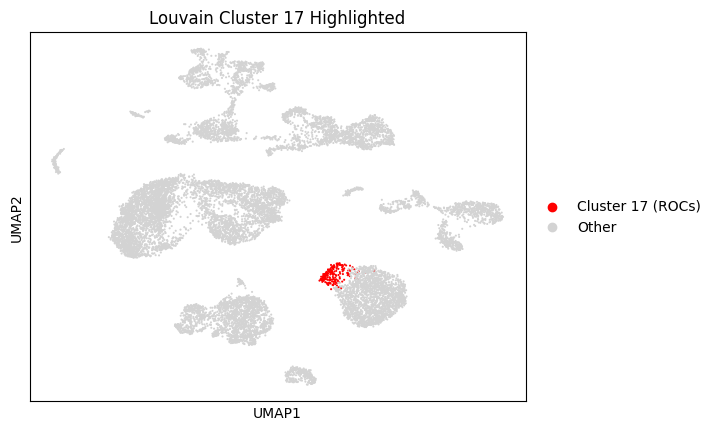

In [ ]:
# UMAP visualization of of Louvain cluster 17, to check if there is overlap where we expect

highlight_cluster = "17"
adata.obs["highlight"] = adata.obs["louvain"].apply(lambda x: "Cluster 17 (ROCs)" if x == highlight_cluster else "Other")
custom_palette = {"Cluster 17 (ROCs)": "red", "Other": "lightgray"}
sc.pl.umap(adata, color="highlight", palette=custom_palette, title=f"Louvain Cluster {highlight_cluster} Highlighted")